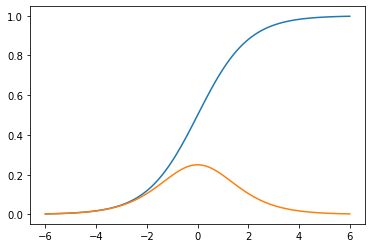

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = tf.linspace(-6, 6, 100)
y = sigmoid(x)
y_derivative = derivative(x)
plt.plot(x, y)
plt.plot(x, y_derivative)

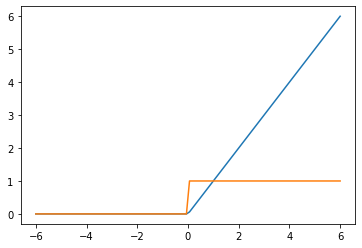

In [37]:
def relu(x):
    return [i if i >= 0 else 0 for i in x]

def derivative(x):
    d = np.array(x, copy = True)
    d[x < 0] = 0
    d[x > 0] = 1
    return d

x = np.linspace(-6, 6, 100)
y = relu(x)
y_derivative = derivative(x)
plt.plot(x, y)
plt.plot(x, y_derivative)

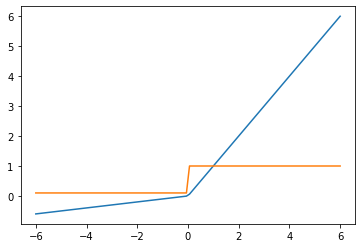

In [39]:
def leakyRelu(x, p):
    return [i if i >= 0 else p * i for i in x]

def derivative(x, p):
    d = np.array(x, copy = True)
    d[x < 0] = p
    d[x > 0] = 1
    return d

p = 0.1
x = np.linspace(-6, 6, 100)
y = leakyRelu(x, p)
y_derivative = derivative(x, p)
plt.plot(x, y)
plt.plot(x, y_derivative)

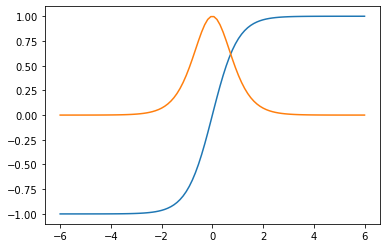

In [42]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return 2 * sigmoid(2 * x) - 1

def derivative(x):
    return 1 - tanh(x) ** 2

x = np.linspace(-6, 6, 100)
y = tanh(x)
y_derivative = derivative(x)
plt.plot(x, y)
plt.plot(x, y_derivative)

In [51]:
import tensorflow as tf
x = tf.constant(1.)
w1 = tf.constant(2.)
b1 = tf.constant(1.)
w2 = tf.constant(2.)
b2 = tf.constant(1.)

with tf.GradientTape(persistent=True) as tape:
    tape.watch([w1, b1, w2, b2])
    y1 = x * w1 + b1
    y2 = y1 * w2 + b2
    
dy2_dy1 = tape.gradient(y2, [y1])[0]
dy1_dw1 = tape.gradient(y1, [w1])[0]
dy2_dw1 = tape.gradient(y2, [w1])[0]

print(dy2_dy1, dy1_dw1)
print(dy2_dy1 * dy1_dw1)
print(dy2_dw1)

tf.Tensor(2.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [60]:
import numpy as np
def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

x = np.arange(-6, 6, 0.01)
y = np.arange(-6, 6, 0.01)
print(x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print(X.shape, Y.shape)
Z = himmelblau([X, Y])
print(Z.shape)

(1200,) (1200,)
(1200, 1200) (1200, 1200)
(1200, 1200)


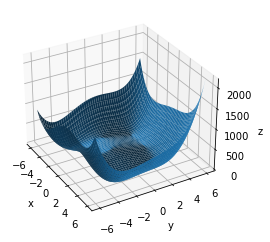

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure('himmelblau')
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, Z)
ax.view_init(30, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [78]:
x = tf.constant([4., 0.])

for step in range(200):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)
    grads = tape.gradient(y, [x])[0]
    x -= 0.01 * grads
    if step % 20 == 19:
        print('step {}: x = {}, f(x) = {}'.format(step, x.numpy(), y.numpy()))

step 19: x = [ 3.5381215 -1.3465767], f(x) = 3.7151756286621094
step 39: x = [ 3.5843277 -1.8470241], f(x) = 3.4506843803683296e-05
step 59: x = [ 3.584428  -1.8481253], f(x) = 4.206412995699793e-11
step 79: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 99: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 119: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 139: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 159: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 179: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13
step 199: x = [ 3.5844283 -1.8481264], f(x) = 2.2737367544323206e-13


(2000, 2) (2000,)
(1400, 2) (600, 2) (1400,) (600,)


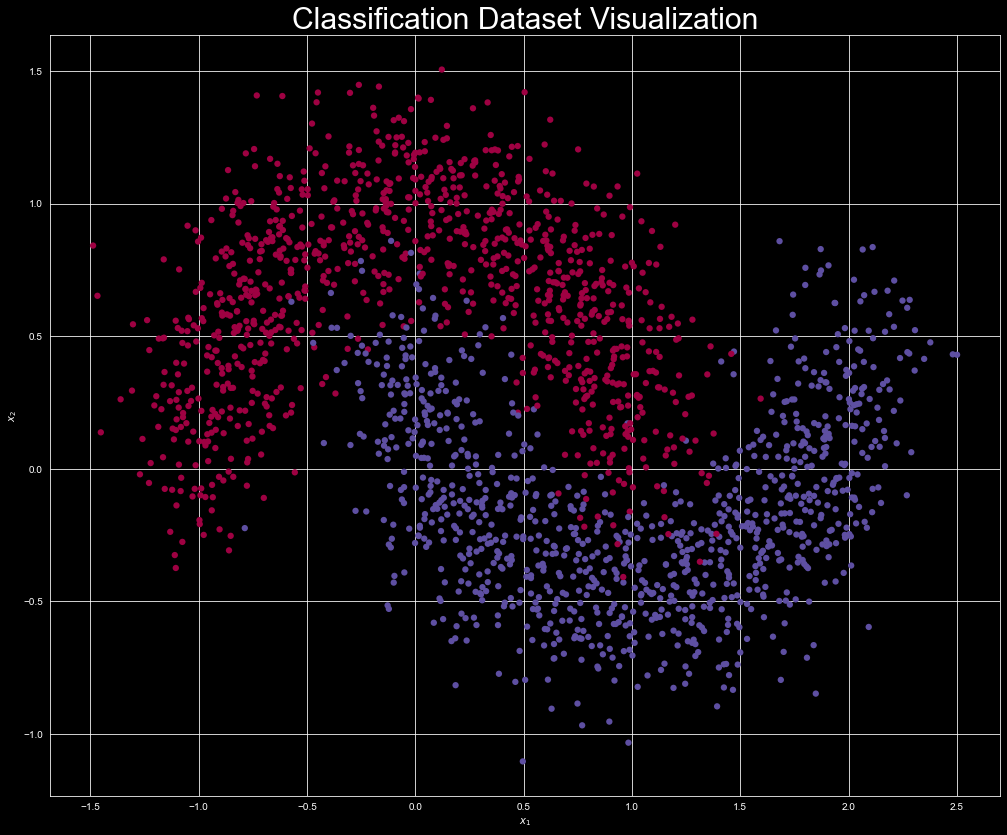

In [119]:
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
N_SAMPLES = 2000
TEST_SIZE = 0.3
X, y = make_moons(n_samples=N_SAMPLES, noise = 0.2, random_state=100)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

def make_plot(X, y, plot_name, file_name = None, XX = None, YY = None, preds = None, dark = False):
    if dark:
        plt.style.use("dark_background")
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(22, 14))
    axes = plt.gca()
    axes.set(xlabel = "$ x_1 $", ylabel = "$ x_2 $")
    plt.title(plot_name, fontsize = 30)
    plt.subplots_adjust(left = 0.20)
    plt.subplots_adjust(right = 0.80)
    if XX is not None and YY is not None and preds is not None:
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap = plt.cm.Spectral)
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, levels = [.5], cmap = "Greys", vmin = 0, vmax = .6)
    plt.scatter(X[:, 0], X[:, 1], c = y.ravel(), s = 40, cmap = plt.cm.Spectral, edgecolors="none")
    plt.savefig("dataset.svg")
#     plt.close()
    
make_plot(X, y, "Classification Dataset Visualization", dark = True)
plt.show()

In [122]:
class Layer:
    def __init__(self, n_input, n_neurons, activation  =None, weights = None, bias = None):
        # 输入节点、输出节点、激活函数类型、权值张量和偏置
        self.weights = weights if weights is not None else np.random.randn(n_input,  n_neurons) * np.sqrt(1 / n_neurons)
        self.bias = bias if bias is not None else np.random.rand(n_neurons) * 0.1
        self.activation = activation
        self.last_activation = None
        self.error = None
        self.delta = None
        
    def activate(self, x):
        # 前向传播函数
        r = np.dot(x, self.weights) + self.bias
        self.last_activation = self._apply_activation(r)
        return self.last_activation
    
    def _apply_activation(self, r):
        # 激活函数
        if self.activation is None:
            return r
        elif self.activation == 'relu':
            return np.maximum(r, 0)
        elif self.activation == 'tanh':
            return np.tanh(r)
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
            
        return r
    
    def apply_activation_derivative(self, r):
        # 计算激活函数导数
        if self.activation is None:
            return np.ones_like(r)
        elif self.activation == 'relu':
            grad = np.array(r, copy = True)
            grad[r > 0] = 1.
            grad[r <= 0] = 0.
            return grad
        elif self.activation == 'tanh':
            return 1 - r ** 2
        elif self.activation == 'sigmoid':
            return r * (1 - r)
        
        return r

In [130]:
class NeuralNetwork:
    def __init__(self):
        self._layers = []

    def add_layer(self, layer):
        # 追加网络层
        self._layers.append(layer)

    def feed_forward(self, X):
        # 前向传播
        for layer in self._layers:
            X = layer.activate(X)
        return X
        
    def backpropagation(self, X, y, learning_rate):
        # 后向传播
        output = self.feed_forward(X)
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            if layer == self._layers[-1]:
                layer.error = y - output
                layer.delta = layer.error * layer.apply_activation_derivative(output)
            else:
                next_layer = self._layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.last_activation)
                
        for i in range(len(self._layers)):
            layer = self._layers[i]
            o_i = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
            layer.weights += layer.delta * o_i.T * learning_rate
            
    def train(self, X_train, X_test, y_train, y_test, learning_rate, max_epochs):
        y_onehot = np.zeros((y_train.shape[0], 2))
        y_onehot[np.arange(y_train.shape[0]), y_train] = 1
        
        mses = []
        accuracys = []
        for i in range(max_epochs + 1):
            for j in range(len(X_train)):
                self.backpropagation(X_train[j], y_onehot[j], learning_rate)
            if i % 10 == 0:
                mse = np.mean(np.square(y_onehot - self.feed_forward(X_train)))
                mses.append(mse)
                accuracy = self.accuracy(self.predict(X_test), y_test.flatten())
                accuracys.append(accuracy)
                print("Epoch: # %s, MSE: %f" % (i, float(mse)))
                print("Accuracy: %.2f%%"% (accuracy * 100))
                
        return mses, accuracys
    
    def predict(self, X):
        return self.feed_forward(X)
    
    def accuracy(self, X, y):
        return np.sum(np.equal(np.argmax(X, axis=1), y)) / y.shape[0]  

In [131]:
nn = NeuralNetwork()  # 实例化网络类
nn.add_layer(Layer(2, 25, 'sigmoid'))  # 隐藏层 1, 2=>25
nn.add_layer(Layer(25, 50, 'sigmoid'))  # 隐藏层 2, 25=>50
nn.add_layer(Layer(50, 25, 'sigmoid'))  # 隐藏层 3, 50=>25
nn.add_layer(Layer(25, 2, 'sigmoid'))  # 输出层, 25=>2
mses, accuracys = nn.train(X_train, X_test, y_train, y_test, 0.01, 1000)

Epoch: # 0, MSE: 0.249136
Accuracy: 49.50%
Epoch: # 10, MSE: 0.198384
Accuracy: 80.33%
Epoch: # 20, MSE: 0.103692
Accuracy: 86.67%
Epoch: # 30, MSE: 0.096760
Accuracy: 88.50%
Epoch: # 40, MSE: 0.096347
Accuracy: 89.17%
Epoch: # 50, MSE: 0.096300
Accuracy: 89.17%
Epoch: # 60, MSE: 0.096279
Accuracy: 89.17%
Epoch: # 70, MSE: 0.096261
Accuracy: 89.17%
Epoch: # 80, MSE: 0.096244
Accuracy: 89.17%
Epoch: # 90, MSE: 0.096228
Accuracy: 89.00%
Epoch: # 100, MSE: 0.096212
Accuracy: 89.00%
Epoch: # 110, MSE: 0.096196
Accuracy: 89.00%
Epoch: # 120, MSE: 0.096180
Accuracy: 88.83%
Epoch: # 130, MSE: 0.096163
Accuracy: 88.83%
Epoch: # 140, MSE: 0.096145
Accuracy: 88.83%
Epoch: # 150, MSE: 0.096125
Accuracy: 88.83%
Epoch: # 160, MSE: 0.096101
Accuracy: 88.83%
Epoch: # 170, MSE: 0.096072
Accuracy: 88.83%
Epoch: # 180, MSE: 0.096035
Accuracy: 88.83%
Epoch: # 190, MSE: 0.095985
Accuracy: 88.83%
Epoch: # 200, MSE: 0.095916
Accuracy: 88.83%
Epoch: # 210, MSE: 0.095818
Accuracy: 89.00%
Epoch: # 220, MSE: 0.

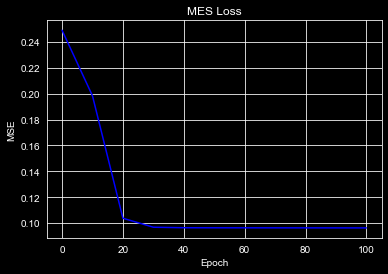

In [132]:
x = [i for i in range(0, 101, 10)]

# 绘制MES曲线
plt.title("MES Loss")
plt.plot(x, mses[:11], color='blue')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

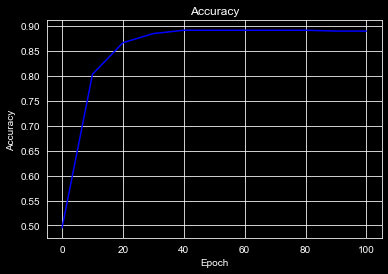

In [134]:
# 绘制Accuracy曲线
plt.title("Accuracy")
plt.plot(x, accuracys[:11], color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()